In [2]:
import requests
import sqlite3 as lite
import time
from dateutil.parser import parse
import collections
import sched

In [3]:
def bikedata_get():
    r = requests.get('http://www.citibikenyc.com/stations/json')

    exec_time = parse(r.json()['executionTime'])

    id_bikes = collections.defaultdict(int)

    for station in r.json()['stationBeanList']:
        id_bikes[station['id']] = station['availableBikes']

    con = lite.connect('citi_bike.db')
    cur = con.cursor()

    with con:
        cur.execute('INSERT INTO available_bikes (execution_time) VALUES (?)', (exec_time.strftime('%s'),))
        for k, v in id_bikes.iteritems():
            cur.execute("UPDATE available_bikes SET _" + str(k) + " =" + str(v) + " WHERE execution_time = " + exec_time.strftime('%s') + ";")    

In [4]:
scheduler = sched.scheduler(time.time, time.sleep)

def scheduler_bike():
    scheduler.enter(0, 1, bikedata_get, ())
    scheduler.run()
    time.sleep(60)

In [5]:
for i in range(60):
    scheduler_bike()

In [9]:
import pandas as pd
import sqlite3 as lite

con = lite.connect('citi_bike.db')
cur = con.cursor()

In [10]:
df = pd.read_sql_query("SELECT * FROM available_bikes ORDER BY execution_time",con,index_col='execution_time')

In [13]:
con.close()

In [12]:
df

_72  _79  _82  _83  _116  _119  _120  _127  _128  _137  ...    \
execution_time                                                          ...     
1431438146        8   14    2   18     0     4     4     7     9    16  ...     
1431438211        9   14    2   18     0     4     4     7     9    17  ...     
1431438265        9   14    2   18     0     4     4     7     9    17  ...     
1431438330        9   14    2   18     0     4     4     7     9    17  ...     
1431438384        9   14    2   18     0     4     4     6     9    17  ...     
1431438449        9   14    2   18     0     4     4     6     9    17  ...     
1431438504        9   14    2   18     0     4     4     5     9    17  ...     
1431438569        9   14    2   18     0     4     4     5     8    17  ...     
1431438623        9   14    2   18     0     4     4     5     8    17  ...     
1431438688        9   14    2   18     0     3     4     5     9    16  ...     
1431438742        9   14    2   18     0     3     4     6    10    16  ...     
1431438807        9   15    1   18     0     3     4     6    12    16  ...     
1431438861        9   15    1   18     0     3     4     6    12    16  ...     
1431438927        9   15    1   18     0     3     4     5    12    16  ...     
1431438981        9   15    1   18     0     3     4     5    12    16  ...     
1431439046        9   15    1   18     0     3     4     5    12    17  ...     
1431439121        9   15    1   18     0     3     4     5    12    17  ...     
1431439186        9   15    1   18     0     3     4     5    12    17  ...     
1431439240        9   15    1   18     0     3     4     5    11    17  ...     
1431439305        9   15    1   18     0     3     4     5    15    17  ...     
1431439359        9   15    1   18     0     3     4     5    15    18  ...     
1431439424        9   15    1   18     0     3     4     5    15    18  ...     
1431439479        9   15    1   18     0     3     4     5    14    18  ...     
1431439544        9   15    1   18     0     3     4     4    14    18  ...     
1431439598        9   15    1   18     0     3     4     4    14    17  ...     
1431439663        9   15    0   18     0     0     4     4    14    17  ...     
1431439717        9   15    0   18     0     0     4     4    15    17  ...     
1431439782        9   15    0   18     0     0     4     4    14    17  ...     
1431439837        9   15    0   18     0     0     4     4    14    16  ...     
1431439902        9   15    0   18     0     0     4     4    14    16  ...     
1431439956        9   15    0   18     0     0     4     4    13    16  ...     
1431440021        9   14    0   18     0     0     4     4    12    16  ...     
1431440086        9   14    0   18     0     0     4     4    11    16  ...     
1431440140        9   14    0   18     0     1     4     3    11    16  ...     
1431440205        9   14    0   18     0     1     4     4    11    16  ...     
1431440259        9   14    0   18     0     1     4     3    11    16  ...     
1431440324        9   14    0   18     0     1     4     2    11    16  ...     
1431440378        9   14    0   18     0     1     4     1    11    15  ...     
1431440438       10   14    0   18     0     1     4     1    11    15  ...     
1431440503       10   14    0   18     0     1     4     1    11    15  ...     
1431440557       10   15    0   18     0     1     4     1    11    15  ...     
1431440622       10   15    0   18     0     1     4     1    11    14  ...     
1431440676       10   15    0   18     0     1     4     1    11    14  ...     
1431440741       10   15    0   18     0     1     4     1    11    14  ...     
1431440796       10   15    0   18     0     1     4     1    11    14  ...     
1431440861       10   15    0   18     0     1     4     1    11    14  ...     
1431440925       10   16    0   18     0     1     4     1    11    14  ...     
1431440980       10   16    0   18     0     1 

In [16]:
hour_change = collections.defaultdict(int)
for col in df.columns:
    station_vals = df[col].tolist()
    station_id = col[1:]
    station_change = 0
    for k,v in enumerate(station_vals):
        if k < len(station_vals) -1:
            station_change += abs(station_vals[k] - station_vals[k+1])
    hour_change[int(station_id)] = station_change

In [17]:
hour_change

defaultdict(<type 'int'>, {512: 8, 513: 6, 514: 2, 515: 13, 516: 5, 517: 10, 518: 17, 519: 18, 520: 12, 521: 27, 522: 7, 523: 21, 524: 11, 525: 4, 526: 9, 527: 1, 528: 8, 529: 19, 530: 10, 531: 8, 532: 11, 533: 8, 534: 3, 536: 7, 537: 29, 538: 16, 539: 7, 2022: 6, 545: 15, 546: 16, 2003: 0, 72: 3, 2000: 4, 79: 4, 82: 2, 83: 0, 3002: 15, 2002: 2, 2012: 10, 116: 0, 2004: 11, 119: 5, 120: 0, 2009: 1, 127: 17, 128: 19, 137: 10, 143: 1, 144: 1, 146: 11, 147: 17, 150: 6, 151: 9, 152: 6, 153: 16, 157: 4, 160: 3, 161: 22, 2017: 3, 164: 6, 167: 3, 168: 0, 173: 16, 174: 11, 2023: 4, 2006: 22, 195: 6, 2010: 5, 212: 0, 216: 4, 217: 8, 218: 0, 223: 7, 224: 16, 225: 11, 228: 6, 229: 0, 2001: 0, 232: 0, 233: 0, 236: 8, 237: 17, 238: 10, 239: 2, 241: 0, 242: 2, 243: 7, 244: 3, 245: 1, 247: 5, 248: 2, 249: 9, 250: 11, 251: 10, 252: 10, 253: 13, 254: 12, 2005: 0, 257: 5, 258: 3, 259: 9, 260: 3, 261: 0, 262: 3, 263: 9, 264: 10, 265: 10, 266: 2, 267: 7, 268: 13, 270: 2, 271: 9, 2008: 11, 274: 4, 275: 2, 2

In [19]:
def keywithmaxval(d):
    v = list(d.values())
    k = list(d.keys())
    
    return k[v.index(max(v))]

max_station = keywithmaxval(hour_change)
max_station

281

In [23]:
from datetime import datetime

In [25]:
con = lite.connect('citi_bike.db')
cur = con.cursor()
cur.execute("SELECT id, stationname, latitude, longitude FROM citibike_reference WHERE id = ?", (max_station,))
data = cur.fetchone()

print "The most active station is station id %s at %s latitude: %s longitude: %s " % data


The most active station is station id 281 at Grand Army Plaza & Central Park S latitude: 40.7643971 longitude: -73.97371465 


In [41]:
print "With " + str(hour_change[max_station]) + " bicycles coming and going in the hour between " + datetime.fromtimestamp(int(df.index[0])).strftime('%Y-%m-&d %H:%M:%S') + " and " + datetime.fromtimestamp(int(df.index[-1])).strftime('%Y-%m-%d %H:%M:%S')

With 39 bicycles coming and going in the hour between 2015-05-&d 14:42:26 and 2015-05-12 15:41:57


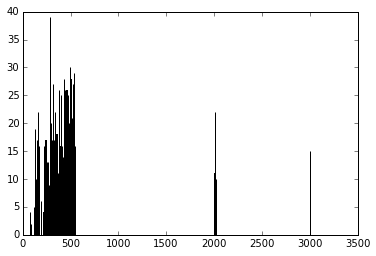

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(hour_change.keys(), hour_change.values())
plt.show()